## Running GHZ circuit on Braket local simulators

<div class="alert alert-block alert-info">
- This is an example usage of the braket SDK for constructing a GHZ quantum circuit, for more details about it, please refer to this <a href = "https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state">link</a>
<br> - All the following simulations are using the braket SDK managed simulators, for more details about the simulators, please check their documentation regarding <a href="https://docs.aws.amazon.com/braket/latest/developerguide/braket-devices.html#choose-a-simulator">choosing a simulator</a>
<br> - The information here are based on tutorials I attended and the SDK documentation, please contact me if you have suggestions or notes

In [1]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker
t = Tracker().start()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import string
import numpy as np

from braket.circuits import Circuit
from braket.devices import LocalSimulator

#for Gates query
from braket.circuits import Gate
from braket.circuits import Instruction
from braket.circuits import Observable

#for braket devices
from braket.aws import AwsDevice

import braket._sdk as braket_sdk
braket_sdk.__version__

'1.32.1.post0'

In [3]:
#function to prepare a GHZ circuit
def prepare_ghz_circuit(qubit_count):
    circuit = Circuit()
    circuit.h(0)
    for i in range(qubit_count - 1):
        circuit.cnot(i, i + 1)
    return circuit

In [4]:
# define the circuit
n_qubits = 3
ghz = prepare_ghz_circuit(n_qubits)
print(ghz)


T  : |0|1|2|
            
q0 : -H-C---
        |   
q1 : ---X-C-
          | 
q2 : -----X-

T  : |0|1|2|


Counter({'111': 511, '000': 489})


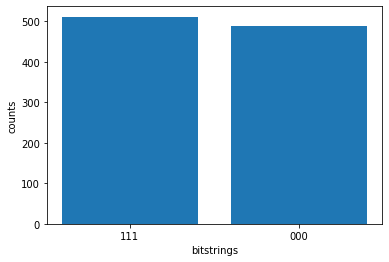

In [5]:
# define the device to run the circuit on, here we use the LocalSimulator
device = LocalSimulator()
# run the circuit
task = device.run(ghz, shots=1000)
# get the results
result = task.result()
counts = result.measurement_counts
print(counts)

# plot the results
plt.bar(counts.keys(), counts.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')
plt.show()

### simulate locally and retrieve state_vector result type

In [6]:
# add the state_vector ResultType
ghz.state_vector()
# add the Z \otimes Z \otimes Z expectation value
ghz.expectation(Observable.Z() @ Observable.Z() @ Observable.Z(), target=[0,1,2])
# add the amplitude for |111>
ghz.amplitude(state=["111"])
# print circuit including requested result types
print(ghz)

T  : |0|1|2|   Result Types   |
                               
q0 : -H-C---Expectation(Z@Z@Z)-
        |   |                  
q1 : ---X-C-Expectation(Z@Z@Z)-
          | |                  
q2 : -----X-Expectation(Z@Z@Z)-

T  : |0|1|2|   Result Types   |

Additional result types: StateVector, Amplitude(111)


for more info: https://docs.aws.amazon.com/braket/latest/developerguide/braket-result-types.html 

for running on QPU: https://docs.aws.amazon.com/braket/latest/developerguide/braket-get-started-run-circuit.html or check the other notebooks